In [94]:
!pip install yfinance
!pip install matplotlib
!pip install requests
!pip install bs4
!pip install html5lib 
!pip install lxml
!pip install plotly
!pip install pandas
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import warnings
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [95]:
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [96]:
# URLs
#
url_tesla_revenue = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
print(url_tesla_revenue)
#
url_gme_revenue = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
print(url_gme_revenue)

https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm
https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html


In [97]:
# Make Requests for Data for revenue

data_tesla_revenue  = requests.get(url_tesla_revenue).text

data_gme_revenue  = requests.get(url_gme_revenue).text

In [98]:
# Create an instance for Beautiful soup

soup_tesla_revenue = BeautifulSoup(data_tesla_revenue, 'html.parser')
print(soup_tesla_revenue.title)
#
soup_gme_revenue = BeautifulSoup(data_gme_revenue, 'html.parser')
print(soup_gme_revenue.title)

<title>Tesla Revenue 2010-2022 | TSLA | MacroTrends</title>
<title>GameStop Revenue 2006-2020 | GME | MacroTrends</title>


In [99]:
# get data for tesla from ticker
tesla_data = yf.Ticker("TSLA")

tesla_share_price_data = tesla_data.history(period="max")
tesla_share_price_data.head()


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [112]:
# Prep dataframe for plotting graph
# This below step is quirky it did run with Date, close and also complained about it
plot_ready_tesla_share_price_data = tesla_share_price_data[['Close']].copy()
plot_ready_tesla_share_price_data.head()

,Close
0,1.592667
1,1.588667
2,1.464000
3,1.280000
4,1.074000


In [101]:
#RESET Index for tesla shares data data frame 
tesla_share_price_data.reset_index(inplace=True)
plot_ready_tesla_share_price_data.reset_index(inplace=True)

In [102]:
# Extract tesla revenue into data frame  via beautiful soup

#Create an instance of pd to hold data
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])
tesla_revenue_soup_rows = soup_tesla_revenue.find("tbody").find_all('tr')
for row in tesla_revenue_soup_rows:
    col = row.find_all_next("td")
    date = col[0].text
    revenue = col[1].text
    revenue = revenue.replace(',',"").replace('$',"")
    # Finally we append the data of each row to the table
    tesla_revenue = pd.concat([tesla_revenue,pd.DataFrame({"Date":[date], "Revenue":[revenue]})], ignore_index=True)

tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]
tesla_revenue.tail(5)


,Date,Revenue
8,2013,2013
9,2012,413
10,2011,204
11,2010,117
12,2009,112


In [103]:
#RESET Index for tesla REVENUE data data frame 
tesla_revenue.reset_index(inplace=True)

In [104]:
# get data for GME from ticker
gme_data = yf.Ticker("GME")
gme_share_price_data = gme_data.history(period="max")
gme_share_price_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [113]:
# Prep dataframe for plotting graph
# This below step is quirky it did run with Date, close and also complained about it
plot_ready_gme_share_price_data = gme_share_price_data[['Close']].copy()
plot_ready_gme_share_price_data.head()

,Close
0,1.691667
1,1.683250
2,1.674834
3,1.607504
4,1.662210


In [106]:
#RESET Index for GME  SHARES data data frame 
gme_share_price_data.reset_index(inplace=True)
plot_ready_gme_share_price_data.reset_index(inplace=True)

In [107]:
# Extract GME  REVENUE into data frame  via beautiful soup

#Create an instance of pd to hold data
gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])
gme_revenue_soup_rows = soup_gme_revenue.find("tbody").find_all('tr')
for row in gme_revenue_soup_rows:
    col = row.find_all_next("td")
    date = col[0].text
    revenue = col[1].text
    revenue = revenue.replace(',',"").replace('$',"")
    # Finally we append the data of each row to the table
    gme_revenue = pd.concat([gme_revenue,pd.DataFrame({"Date":[date], "Revenue":[revenue]})], ignore_index=True)

gme_revenue.dropna(inplace=True)
gme_revenue = gme_revenue[gme_revenue['Revenue'] != ""]
gme_revenue.tail(5)

,Date,Revenue
11,2009,8806
12,2008,7094
13,2007,5319
14,2006,3092
15,2005,1843


In [108]:
#RESET Index for GME  SHARES data data frame 
gme_revenue.reset_index(inplace=True)

In [109]:
# Create make_graph function

def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()



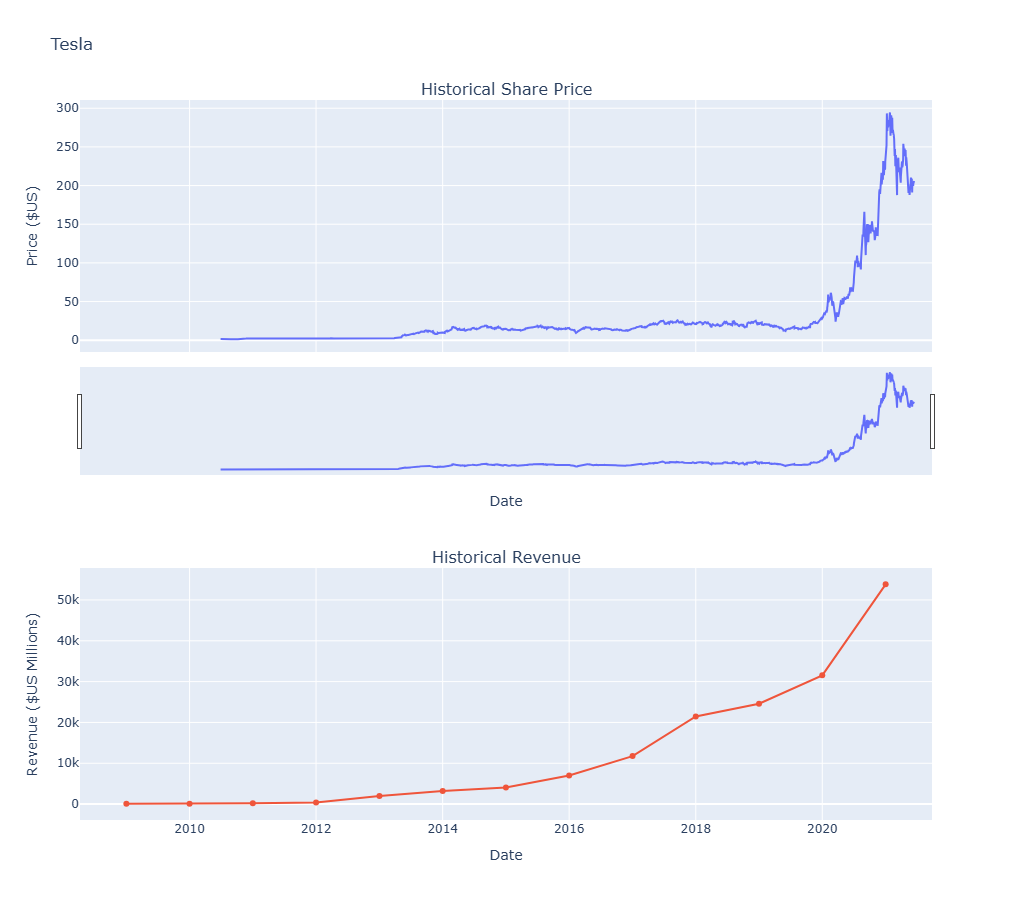

In [110]:
# Make plot for Tesla
make_graph(plot_ready_tesla_share_price_data, tesla_revenue, 'Tesla')

In [111]:
# Make plot for gme
make_graph(plot_ready_gme_share_price_data, gme_revenue, 'GameStop')